In [1]:
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import DataFrame
import pandas as pd
import matplotlib as mpl
#import seaborn as sea
#import folium as fol
import sklearn as sci
import requests
import folium
import datacommons_pandas as dc

from geopy.geocoders import Nominatim
from tqdm import tqdm
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# load the data set and drop three features ("Area", "ConvexArea", "Class") that are not relevant to this analysis.

df = pd.read_csv("https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Dry_Bean_Dataset.csv")

df.drop(["Area", "ConvexArea", "Class"], axis=1, inplace=True)

df.describe().T


,count,mean,std,min,25%,50%,75%,max
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677
roundness,13611.0,0.873282,0.059520,0.489618,0.832096,0.883157,0.916869,0.990685
Compactness,13611.0,0.799864,0.061713,0.640577,0.762469,0.801277,0.834270,0.987303


In [4]:
# Load the dataset
url = "https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Dry_Bean_Dataset.csv"
df = pd.read_csv(url)

# Drop unnecessary features
df.drop(["Area", "ConvexArea", "Class"], axis=1, inplace=True)

# Display dataset structure
print("Dataset Shape:", df.shape)
print("First 5 rows:\n", df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

Dataset Shape: (13611, 14)
First 5 rows:
    Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  Eccentricity  \
0    610.291       208.178117       173.888747      1.197191      0.549812   
1    638.018       200.524796       182.734419      1.097356      0.411785   
2    624.110       212.826130       175.931143      1.209713      0.562727   
3    645.884       210.557999       182.516516      1.153638      0.498616   
4    620.134       201.847882       190.279279      1.060798      0.333680   

   EquivDiameter    Extent  Solidity  roundness  Compactness  ShapeFactor1  \
0     190.141097  0.763923  0.988856   0.958027     0.913358      0.007332   
1     191.272750  0.783968  0.984986   0.887034     0.953861      0.006979   
2     193.410904  0.778113  0.989559   0.947849     0.908774      0.007244   
3     195.467062  0.782681  0.976696   0.903936     0.928329      0.007017   
4     195.896503  0.773098  0.990893   0.984877     0.970516      0.006697   

   ShapeFactor2  Sha

In [5]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe().T)



Summary Statistics:
                    count        mean         std         min         25%  \
Perimeter        13611.0  855.283459  214.289696  524.736000  703.523500   
MajorAxisLength  13611.0  320.141867   85.694186  183.601165  253.303633   
MinorAxisLength  13611.0  202.270714   44.970091  122.512653  175.848170   
AspectRation     13611.0    1.583242    0.246678    1.024868    1.432307   
Eccentricity     13611.0    0.750895    0.092002    0.218951    0.715928   
EquivDiameter    13611.0  253.064220   59.177120  161.243764  215.068003   
Extent           13611.0    0.749733    0.049086    0.555315    0.718634   
Solidity         13611.0    0.987143    0.004660    0.919246    0.985670   
roundness        13611.0    0.873282    0.059520    0.489618    0.832096   
Compactness      13611.0    0.799864    0.061713    0.640577    0.762469   
ShapeFactor1     13611.0    0.006564    0.001128    0.002778    0.005900   
ShapeFactor2     13611.0    0.001716    0.000596    0.000564    0.

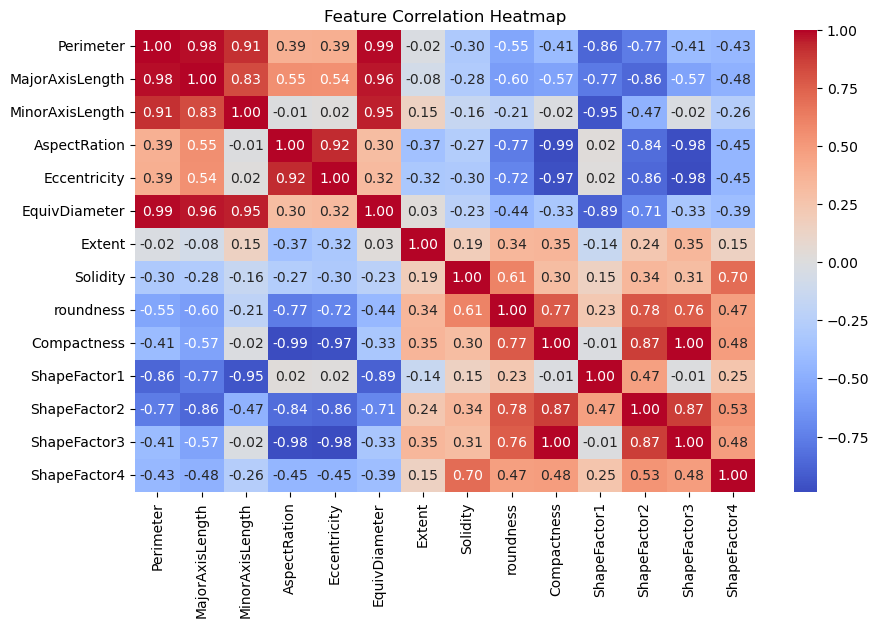

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Split data into features (X) and target (y)
X = df.drop(columns=["Perimeter"])
y = df["Perimeter"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build deep learning model
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1)  # Output layer for regression
])

# Compile model
model.compile(optimizer="adam", loss="mean_squared_error")

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict and evaluate model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("\nR² Score:", r2)


Epoch 1/50


C:\Users\HOME-PC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 712322.2500 - val_loss: 171886.9844
Epoch 2/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 126964.8281 - val_loss: 71550.9453
Epoch 3/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64468.3398 - val_loss: 37755.8477
Epoch 4/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31421.0195 - val_loss: 13953.7871
Epoch 5/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10482.2861 - val_loss: 4358.3833
Epoch 6/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3008.6865 - val_loss: 1848.9663
Epoch 7/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1283.0507 - val_loss: 1042.6172
Epoch 8/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 687.4352 - val_loss: 719.7728
Epoch 9/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 464.2219 - val_loss: 548.4651
Epoch 10/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 372.1862 - val_loss: 420.8167
Epoch 11/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 261.6704 - val_loss: 32

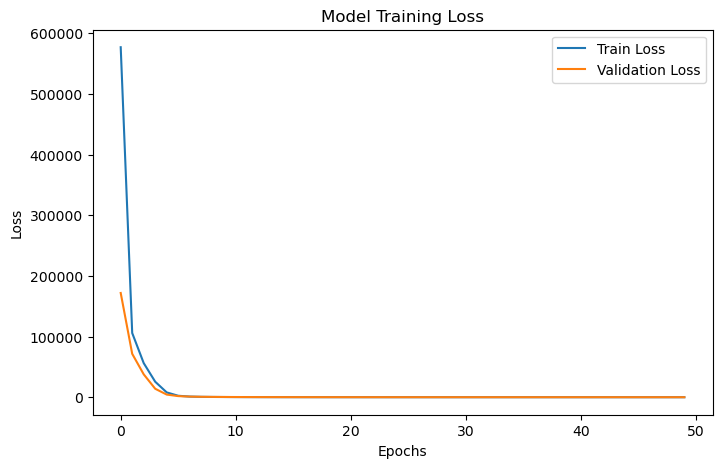

In [8]:
# Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Training Loss")
plt.legend()
plt.show()